# Merge file

In [ ]:
# --- 1. Import thư viện cần thiết ---
import pandas as pd
import os

# --- 2. Đường dẫn tới thư mục chứa các file CSV (trong Colab) ---
# Nếu các file được tải lên Colab, bạn cần chạy lệnh sau:
# from google.colab import files
# uploaded = files.upload()
# Sau đó đặt tất cả file CSV trong cùng một thư mục làm việc

# --- 3. Danh sách các file cần gộp ---
csv_files = ["FPT.csv", "VCB.csv", "PNJ.csv", "HPG.csv", "KDH.csv"]

# --- 4. Tạo list để lưu từng DataFrame ---
list_df = []

for file in csv_files:
    # Đọc file CSV
    df = pd.read_csv(file)

    # Lấy tên file làm mã cổ phiếu (Ticker)
    ticker = os.path.splitext(file)[0]
    df["Ticker"] = ticker  # thêm cột mã cổ phiếu

    # Thêm vào danh sách
    list_df.append(df)

# --- 5. Gộp tất cả DataFrame lại thành một file duy nhất ---
merged_data = pd.concat(list_df, ignore_index=True)

# --- 6. Kiểm tra kích thước và hiển thị 5 dòng đầu ---
print("Số dòng:", len(merged_data))
print("Các cột:", merged_data.columns.tolist())
merged_data.head()

# --- 7. Lưu file hợp nhất ra CSV ---
merged_data.to_csv("merged_stock_data.csv", index=False)
print("\n✅ File 'merged_stock_data.csv' đã được tạo thành công!")

# Nếu muốn tải file về máy:
from google.colab import files
files.download("merged_stock_data.csv")


# Thong ke mo ta

=== (1) Hiển thị thông tin về dữ liệu ===

Số dòng: 12165
Số cột: 8

Tên cột: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Ticker'] 

Các kiểu dữ liệu ban đầu:
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
Ticker      object
dtype: object 

Các kiểu dữ liệu sau khi chuyển đổi:
Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %     object
Ticker       object
dtype: object 


=== (2) Kiểm tra tính toàn vẹn của dữ liệu ===
Số lượng giá trị thiếu (NaN) ở mỗi cột:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Ticker      0
dtype: int64

Tổng số giá trị thiếu: 0

=== (3) Các tính chất thống kê trên dữ liệu số ===


,count,mean,std,min,25%,50%,75%,max
Price,12165.0,3.942673e+04,2.923948e+04,2484.8,14838.9,27977.0,61816.7,133035.8
Open,12165.0,3.942708e+04,2.925482e+04,2414.7,14838.9,28018.0,61871.7,132863.4
High,12165.0,3.987390e+04,2.954107e+04,2494.9,15019.0,28348.0,62600.0,134501.5
Low,12165.0,3.897303e+04,2.893907e+04,2394.7,14621.2,27680.0,61127.0,132259.8
Vol.,12165.0,7.845799e+06,1.456342e+07,5470.0,817170.0,1860000.0,6020000.0,216000000.0



=== (5) Mối tương quan giữa các tính chất (Correlations) ===


,Price,Open,High,Low,Vol.
Price,1.000000,0.999622,0.999835,0.999785,-0.296995
Open,0.999622,1.000000,0.999790,0.999816,-0.296966
High,0.999835,0.999790,1.000000,0.999730,-0.295879
Low,0.999785,0.999816,0.999730,1.000000,-0.297761
Vol.,-0.296995,-0.296966,-0.295879,-0.297761,1.000000


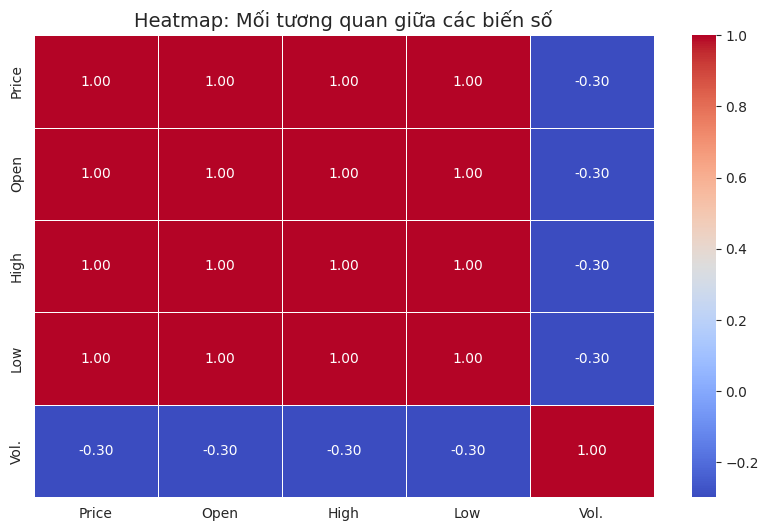

In [2]:
# --- 1. Import thư viện ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Đọc dữ liệu ---
file_path = "merged_stock_data.csv"
df = pd.read_csv(file_path)

# --- 3. Hiển thị thông tin cơ bản ---
print("=== (1) Hiển thị thông tin về dữ liệu ===\n")
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}\n")
print("Tên cột:", df.columns.tolist(), "\n")
print("Các kiểu dữ liệu ban đầu:")
print(df.dtypes, "\n")

# --- 4. Chuyển đổi các cột số bị sai kiểu (Price, Vol. …) ---
for col in df.columns:
    # Loại bỏ ký tự , hoặc K, M nếu có, rồi chuyển sang float
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "")
        .str.replace("K", "e3")
        .str.replace("M", "e6")
    )
    # Nếu có thể chuyển sang dạng số, thì chuyển
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

print("Các kiểu dữ liệu sau khi chuyển đổi:")
print(df.dtypes, "\n")

# --- 5. Kiểm tra tính toàn vẹn dữ liệu ---
print("\n=== (2) Kiểm tra tính toàn vẹn của dữ liệu ===")
missing = df.isnull().sum()
print("Số lượng giá trị thiếu (NaN) ở mỗi cột:\n", missing)
print("\nTổng số giá trị thiếu:", missing.sum())

# --- 6. Các tính chất thống kê trên dữ liệu số ---
print("\n=== (3) Các tính chất thống kê trên dữ liệu số ===")
numeric_cols = df.select_dtypes(include=[np.number])
if numeric_cols.shape[1] == 0:
    print("⚠️ Không tìm thấy cột số nào sau khi đọc file. Kiểm tra lại dữ liệu gốc.")
else:
    desc_stats = numeric_cols.describe().T
    display(desc_stats)


# --- 8. Mối tương quan giữa các tính chất (Correlations) ---
print("\n=== (5) Mối tương quan giữa các tính chất (Correlations) ===")
if numeric_cols.shape[1] > 1:
    corr = numeric_cols.corr(method='pearson')
    display(corr)
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Heatmap: Mối tương quan giữa các biến số", fontsize=14)
    plt.show()
else:
    print("⚠️ Không đủ biến số để tính tương quan.")


In [ ]:
# (4) Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)

# Đối với dữ liệu phân loại (classification problem), cần xem tần suất xuất hiện của các lớp
# để phát hiện sự mất cân bằng dữ liệu (imbalanced data).

if 'Ticker' in df.columns:
    print(df['Ticker'].value_counts())
    print("\nNhận xét:")
    print("• Dữ liệu gồm nhiều mã cổ phiếu như", ", ".join(df['Ticker'].unique()))
    print("• Tần suất giữa các mã khá cân bằng (nếu chênh lệch lớn cần xem xét xử lý mất cân bằng dữ liệu)")
else:
    print("Không có biến phân loại (Category/Class) trong tập dữ liệu.")


=== Ma trận tương quan Pearson (r) ===


,Price,Open,High,Low,Vol.
Price,1.000000,0.999622,0.999835,0.999785,-0.296995
Open,0.999622,1.000000,0.999790,0.999816,-0.296966
High,0.999835,0.999790,1.000000,0.999730,-0.295879
Low,0.999785,0.999816,0.999730,1.000000,-0.297761
Vol.,-0.296995,-0.296966,-0.295879,-0.297761,1.000000


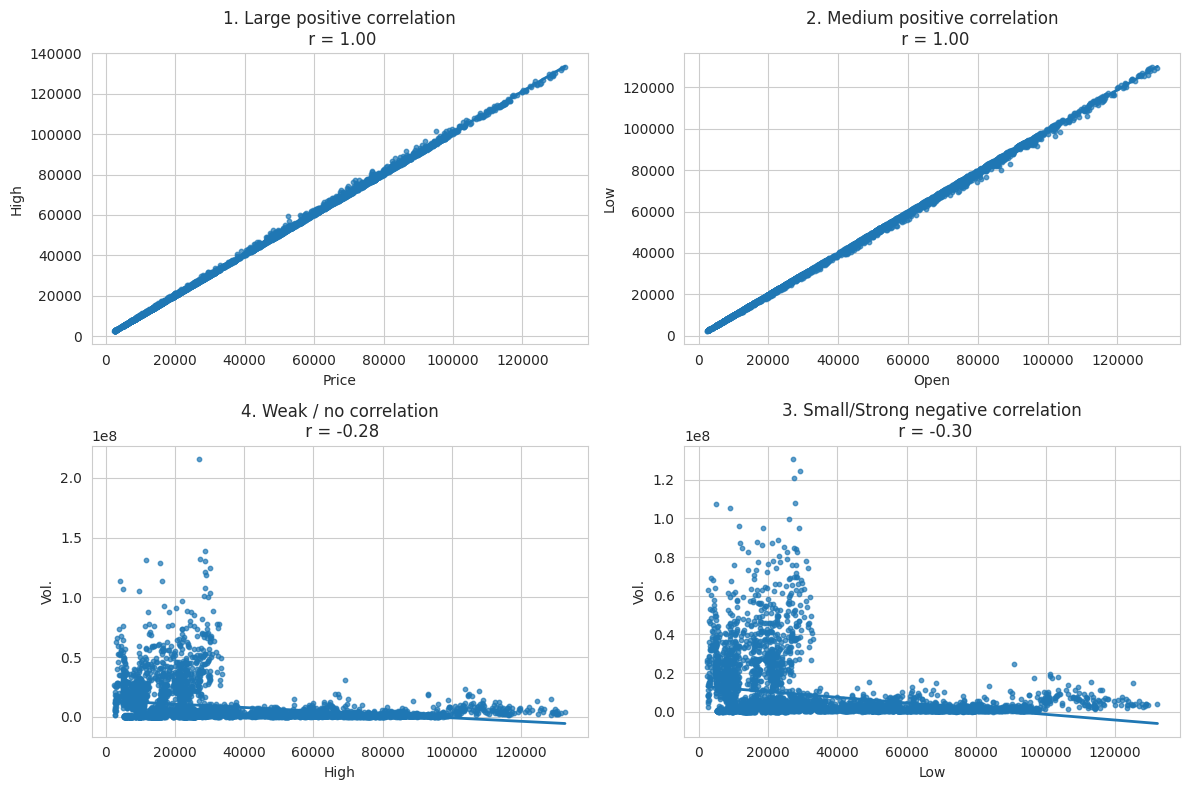


Quy ước mức độ (|r|): Small: 0.10–0.30 | Medium: 0.30–0.50 | Large: 0.50–1.00


In [3]:
# ========== (5) MỐI TƯƠNG QUAN GIỮA CÁC TÍNH CHẤT (CORRELATIONS) ==========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) Chọn các cột số để tính tương quan
numeric_df = df.select_dtypes(include=[np.number]).copy()

# Nếu cột 'Vol.'/Volume đang là chuỗi có K/M, ép kiểu nhanh (an toàn nếu đã ép trước thì bỏ qua)
for col in numeric_df.columns:
    pass  # đã là số thì giữ nguyên

# 1) Ma trận tương quan Pearson
corr = numeric_df.corr(method='pearson')
print("=== Ma trận tương quan Pearson (r) ===")
display(corr)

# 2) Hàm chọn cặp biến theo tiêu chí (mạnh / vừa / yếu / âm)
def pick_pairs(corr_mat):
    # Lấy phần tam giác trên, loại đường chéo
    pairs = []
    cols = corr_mat.columns.tolist()
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            r = corr_mat.iloc[i, j]
            pairs.append((cols[i], cols[j], r))

    if not pairs:
        return []

    # Sắp xếp theo |r| giảm dần
    pairs_sorted_abs = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)
    pairs_sorted_pos = sorted([p for p in pairs if p[2] > 0], key=lambda x: x[2], reverse=True)
    pairs_sorted_neg = sorted([p for p in pairs if p[2] < 0], key=lambda x: x[2])  # tăng dần (âm mạnh nhất trước)

    chosen = {}

    # DƯƠNG MẠNH: r >= 0.5
    for p in pairs_sorted_pos:
        if p[2] >= 0.5:
            chosen["Large positive"] = p
            break
    # DƯƠNG VỪA: 0.3 <= r < 0.5
    for p in pairs_sorted_pos:
        if 0.3 <= p[2] < 0.5 and "Medium positive" not in chosen:
            # tránh trùng biến với ô trước (cho đẹp), không bắt buộc
            if "Large positive" in chosen and (p[0] in chosen["Large positive"][:2] or p[1] in chosen["Large positive"][:2]):
                continue
            chosen["Medium positive"] = p
            break
    # YẾU / KHÔNG: |r| < 0.2
    pairs_weak = [p for p in pairs if abs(p[2]) < 0.2]
    if pairs_weak:
        # chọn cặp có |r| nhỏ nhất (gần 0 nhất)
        chosen["Weak / none"] = sorted(pairs_weak, key=lambda x: abs(x[2]))[0]
    else:
        # nếu không có cặp yếu, lấy cặp có |r| nhỏ nhất trong toàn bộ
        chosen["Weak / none"] = pairs_sorted_abs[-1]

    # ÂM: r < 0
    if pairs_sorted_neg:
        chosen["Negative"] = pairs_sorted_neg[0]  # âm mạnh nhất

    # Nếu thiếu mục nào (do dữ liệu), điền bằng cặp tiếp theo tốt nhất
    labels_needed = ["Large positive", "Medium positive", "Weak / none", "Negative"]
    for lb in labels_needed:
        if lb not in chosen:
            for cand in pairs_sorted_abs:
                if all(set(cand[:2]) != set(v[:2]) for v in chosen.values()):
                    chosen[lb] = cand
                    break
    return chosen

chosen_pairs = pick_pairs(corr)

# 3) Vẽ lưới 2x2 giống ảnh mẫu với scatter + đường hồi quy
def scatter_with_trend(ax, x, y, title):
    # bỏ NaN
    m = ~(x.isna() | y.isna())
    X, Y = x[m], y[m]
    if len(X) == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center')
        ax.set_title(title)
        ax.set_xticks([]); ax.set_yticks([])
        return

    # subsample cho nhanh nếu dữ liệu rất lớn
    if len(X) > 5000:
        idx = np.random.choice(len(X), 5000, replace=False)
        X = X.iloc[idx]; Y = Y.iloc[idx]

    ax.scatter(X, Y, s=10, alpha=0.7)
    # đường hồi quy tuyến tính
    try:
        b1, b0 = np.polyfit(X, Y, 1)  # Y ≈ b1*X + b0
        x_line = np.linspace(X.min(), X.max(), 100)
        y_line = b1 * x_line + b0
        ax.plot(x_line, y_line, linewidth=2)
    except Exception:
        pass
    # hệ số r
    r = np.corrcoef(X, Y)[0,1]
    ax.set_title(f"{title}\n r = {r:.2f}")
    ax.set_xlabel(X.name); ax.set_ylabel(Y.name)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

titles_order = [
    "1. Large positive correlation",
    "2. Medium positive correlation",
    "4. Weak / no correlation",
    "3. Small/Strong negative correlation"
]

pair_keys_order = ["Large positive", "Medium positive", "Weak / none", "Negative"]
for ax, t, key in zip(axes, titles_order, pair_keys_order):
    if key in chosen_pairs:
        a, b, r = chosen_pairs[key]
        scatter_with_trend(ax, numeric_df[a], numeric_df[b], t)
    else:
        ax.text(0.5, 0.5, "Not available", ha='center', va='center')
        ax.set_title(t); ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()

# 4) Bảng quy ước mức độ tương quan (in nhanh)
print("\nQuy ước mức độ (|r|): Small: 0.10–0.30 | Medium: 0.30–0.50 | Large: 0.50–1.00")


# Hien thi du lieu

In [ ]:
# ===================== 3.2. HIỂN THỊ DỮ LIỆU (VISUALIZE DATA) =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# --- Đọc & chuẩn bị dữ liệu ---
df = pd.read_csv("merged_stock_data.csv")
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Chuyển các cột số bị sai định dạng
def to_number(s):
    s = str(s)
    s = s.replace(',', '').upper().replace('K','E3').replace('M','E6')
    try:
        return float(s)
    except:
        return np.nan

for col in df.columns:
    if df[col].dtype == 'object' and col not in ['Ticker','Class']:
        conv = df[col].map(to_number)
        if conv.notna().mean() > 0.5:
            df[col] = conv

numeric_df = df.select_dtypes(include=[np.number]).copy()
cat_col = 'Ticker' if 'Ticker' in df.columns else None

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ========== (1) HIỂN THỊ TỪNG TÍNH CHẤT ĐƠN (UNIVARIATE PLOTS) ==========
print("=== (1) Hiển thị từng tính chất đơn (Univariate Plots) ===")

## Boxplot đẹp, có màu và median nổi bật
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, palette="pastel", linewidth=1.5,
            boxprops=dict(alpha=0.7, edgecolor='gray'),
            medianprops=dict(color="red", linewidth=2))
plt.title("Boxplot - Phân bố giá trị của các biến số", fontsize=14, fontweight='bold')
plt.xlabel("Biến số"); plt.ylabel("Giá trị")
plt.xticks(rotation=0)
plt.show()

## Histogram từng biến
numeric_df.hist(bins=40, figsize=(12, 8), color="#66b3ff", edgecolor='black')
plt.suptitle("Histogram - Phân bố tần suất của các biến số", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Boxplot theo từng mã (nếu có Ticker)
if cat_col:
    for col in numeric_df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=cat_col, y=col, palette="Set2", linewidth=1.5)
        plt.title(f"Phân bố {col} theo {cat_col}", fontsize=13)
        plt.xlabel(cat_col); plt.ylabel(col)
        plt.show()

# ========== (2) HIỂN THỊ NHIỀU TÍNH CHẤT (MULTIVARIATE PLOTS) ==========
print("=== (2) Hiển thị nhiều tính chất (Multivariate Plots) ===")

## Scatter Matrix (đẹp hơn mặc định)
if numeric_df.shape[1] > 1:
    scatter_matrix(numeric_df, figsize=(12, 8), alpha=0.7,
                   diagonal='hist', color='#0066cc', hist_kwds={'color':'#99ccff'})
    plt.suptitle("Scatter Matrix giữa các biến số", fontsize=14, fontweight='bold')
    plt.show()

## Pairplot (có màu theo Ticker nếu có)
if cat_col:
    sample_df = df.sample(n=min(len(df), 1500), random_state=42)
    sns.pairplot(sample_df, vars=numeric_df.columns, hue=cat_col,
                 diag_kind='kde', palette='husl', plot_kws={'alpha':0.7, 's':30})
    plt.suptitle("Pairplot - Mối quan hệ giữa các biến theo nhóm", y=1.02, fontsize=14, fontweight='bold')
    plt.show()

## Heatmap tương quan (rất gọn, dùng cmap gradient)
if numeric_df.shape[1] > 1:
    corr = numeric_df.corr(method='pearson')
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"shrink":.8})
    plt.title("Heatmap - Ma trận tương quan Pearson giữa các biến số", fontsize=14, fontweight='bold')
    plt.show()


# Lam sach

In [ ]:
# ==========================================================
# LÀM SẠCH DỮ LIỆU CỔ PHIẾU
# ==========================================================

import pandas as pd
import numpy as np

# --- (1) Tạo bảng dữ liệu làm sạch ---
# Chỉ giữ lại các cột đầu vào (Input) và đầu ra (Output)
df_clean = pd.read_csv("merged_stock_data.csv").copy()
display(df_clean.head())

# --- (2) Xóa dữ liệu trùng lặp (Duplicate Records) ---
duplicates = df_clean[df_clean.duplicated()]
print(f" Số dòng trùng lặp: {len(duplicates)}")
display(duplicates)

# Nếu muốn xóa trùng lặp:
df_clean = df_clean.drop_duplicates()
print(f"Dữ liệu sau khi loại trùng lặp: {df_clean.shape[0]} dòng")

# --- (3) Chuẩn hóa kiểu dữ liệu ---
# Chuyển các cột dạng object chứa ký hiệu về số
def to_number(s):
    s = str(s)
    s = s.replace(',', '').upper().replace('K', 'E3').replace('M', 'E6')
    try:
        return float(s)
    except:
        return np.nan

for col in ['Price', 'Open', 'High', 'Low', 'Vol.']:
    df_clean[col] = df_clean[col].map(to_number)

# Chuyển cột Date về dạng datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')

# --- (4) Kiểm tra giá trị thiếu ---
missing = df_clean.isnull().sum()
print(" Số lượng giá trị thiếu (NaN) mỗi cột:")
display(missing)

# Xóa dòng thiếu toàn bộ dữ liệu chính
df_clean = df_clean.dropna(subset=['Price', 'Open', 'High', 'Low', 'Vol.'])
print(f"Dữ liệu sau khi loại bỏ dòng NaN: {df_clean.shape[0]} dòng")

# --- (5) Phát hiện & loại bỏ giá trị bất thường (outlier) theo IQR ---
for ticker in df_clean['Ticker'].unique():
    vol = df_clean.loc[df_clean['Ticker'] == ticker, 'Vol.']
    Q1, Q3 = vol.quantile(0.25), vol.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outlier_idx = df_clean[(df_clean['Ticker'] == ticker) &
                           ((df_clean['Vol.'] < lower) | (df_clean['Vol.'] > upper))].index
    df_clean = df_clean.drop(index=outlier_idx)

print(f"Sau khi loại outlier theo IQR: {df_clean.shape[0]} dòng")

# --- (6) Lưu file làm sạch ---
df_clean.to_csv("merged_stock_data_cleaned.csv", index=False)
print(" File dữ liệu làm sạch đã được lưu: merged_stock_data_cleaned.csv")


,Date,Price,Open,High,Low,Vol.,Change %,Ticker
0,10/1/2025,"93,400.00","93,200.00","94,500.00","91,400.00",7.41M,0.43%,FPT
1,9/30/2025,"93,000.00","95,500.00","95,800.00","92,800.00",12.02M,-2.62%,FPT
2,9/29/2025,"95,500.00","97,800.00","97,800.00","95,500.00",10.43M,-2.05%,FPT
3,9/26/2025,"97,500.00","98,200.00","99,300.00","97,400.00",8.08M,-0.51%,FPT
4,9/25/2025,"98,000.00","99,500.00","99,500.00","97,900.00",8.63M,-1.51%,FPT


 Số dòng trùng lặp: 0


,Date,Price,Open,High,Low,Vol.,Change %,Ticker


Dữ liệu sau khi loại trùng lặp: 12165 dòng
 Số lượng giá trị thiếu (NaN) mỗi cột:


,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0
Ticker,0


Dữ liệu sau khi loại bỏ dòng NaN: 12165 dòng
Sau khi loại outlier theo IQR: 11528 dòng
 File dữ liệu làm sạch đã được lưu: merged_stock_data_cleaned.csv


# Bien doi du lieu

In [ ]:
# ==========================================================
# BIẾN ĐỔI DỮ LIỆU DANH MỤC (CATEGORY) → DỮ LIỆU SỐ (LABEL ENCODING)
# ==========================================================

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# --- (1) Đọc dữ liệu đã làm sạch ---
df_clean = pd.read_csv("merged_stock_data_cleaned.csv")
print(f"Đã đọc dữ liệu làm sạch: {df_clean.shape[0]} dòng, {df_clean.shape[1]} cột")

# --- (2) Khởi tạo bộ mã hóa ---
class_encoder = LabelEncoder()

# --- (3) Huấn luyện encoder trên cột Ticker ---
class_encoder.fit(df_clean["Ticker"])

# --- (4) Lưu danh sách các class (mã cổ phiếu) ---
class_names = class_encoder.classes_
print("\n Danh sách mã cổ phiếu được mã hóa:")
for i, name in enumerate(class_names):
    print(f"{i} → {name}")

# --- (5) Chuyển đổi Ticker sang giá trị số ---
df_clean["Ticker_Label"] = class_encoder.transform(df_clean["Ticker"])

# --- (6) Hiển thị mẫu kết quả ---
print("\n Kết quả mã hóa mẫu:")
display(df_clean[["Date", "Ticker", "Ticker_Label"]].head(10))

# --- (7) Lưu dữ liệu sau mã hóa ---
output_file = "merged_stock_data_encoded.csv"
df_clean.to_csv(output_file, index=False)
print(f"\n File đã được lưu thành công: {output_file}")


Đã đọc dữ liệu làm sạch: 11528 dòng, 8 cột

 Danh sách mã cổ phiếu được mã hóa:
0 → FPT
1 → HPG
2 → KDH
3 → PNJ
4 → VCB

 Kết quả mã hóa mẫu:


,Date,Ticker,Ticker_Label
0,2025-10-01,FPT,0
1,2025-09-26,FPT,0
2,2025-09-25,FPT,0
3,2025-09-24,FPT,0
4,2025-09-18,FPT,0
5,2025-09-12,FPT,0
6,2025-09-11,FPT,0
7,2025-09-10,FPT,0
8,2025-09-09,FPT,0
9,2025-09-05,FPT,0



 File đã được lưu thành công: merged_stock_data_encoded.csv


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Ticker_Label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Ticker_Label'}, axis=1)
              .sort_values('Ticker_Label', ascending=True))
  xs = counted['Ticker_Label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Ticker_Label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ticker_Label')
_ = plt.ylabel('count()')

 Đã đọc dữ liệu: 11528 dòng, 9 cột

 Dữ liệu sau Min–Max Normalization (0–1):


,Price,Open,High,Low,Vol.,Ticker,Ticker_Label
0,0.696396,0.695946,0.696973,0.685367,0.105818,FPT,0
1,0.727801,0.734276,0.733335,0.731569,0.115392,FPT,0
2,0.731631,0.744241,0.734850,0.735419,0.123252,FPT,0
3,0.743121,0.733509,0.734850,0.731569,0.105960,FPT,0
4,0.769931,0.794069,0.786363,0.774691,0.117107,FPT,0


<Figure size 1200x600 with 0 Axes>

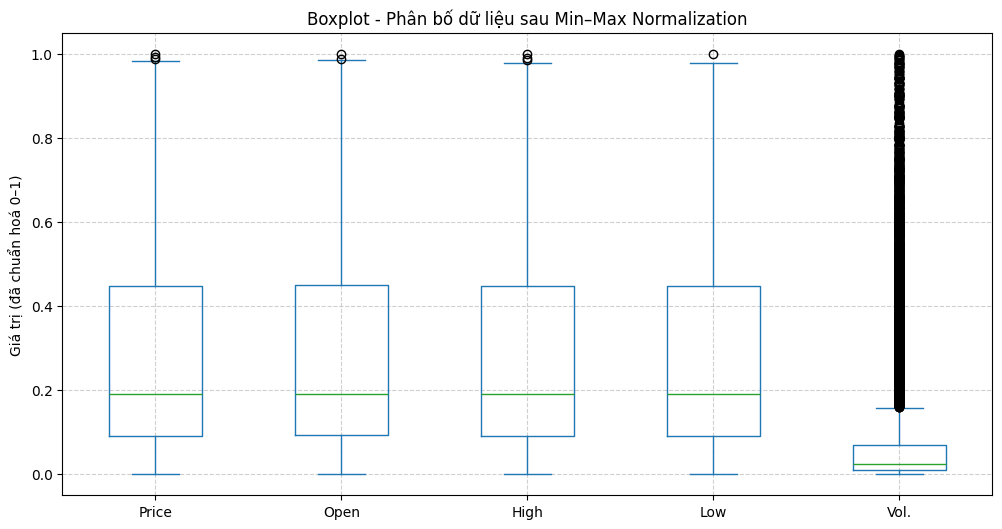


 Ma trận tương quan giữa các biến (sau chuẩn hoá):


,Price,Open,High,Low,Vol.
Price,1.000000,0.999690,0.999859,0.999821,-0.331914
Open,0.999690,1.000000,0.999831,0.999843,-0.331797
High,0.999859,0.999831,1.000000,0.999777,-0.331280
Low,0.999821,0.999843,0.999777,1.000000,-0.332168
Vol.,-0.331914,-0.331797,-0.331280,-0.332168,1.000000


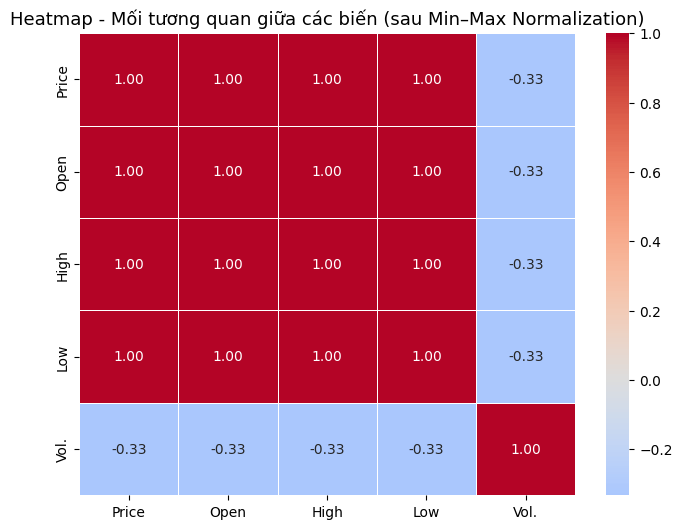

 Đã lưu file: merged_stock_data_normalized_minmax.csv


In [ ]:
# ==========================================================
# CHUẨN HOÁ DỮ LIỆU CỔ PHIẾU BẰNG MIN–MAX NORMALIZATION
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# --- (1) Đọc dữ liệu đã làm sạch & mã hoá ---
df_clean = pd.read_csv("merged_stock_data_encoded.csv")
print(f" Đã đọc dữ liệu: {df_clean.shape[0]} dòng, {df_clean.shape[1]} cột")

# --- (2) Xác định các cột cần chuẩn hoá ---
scale_columns = ["Price", "Open", "High", "Low", "Vol."]

# --- (3) Áp dụng Min–Max Normalization ---
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])

df_minmax = df_clean.copy()
df_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])

# --- (4) Hiển thị dữ liệu sau chuẩn hoá ---
print("\n Dữ liệu sau Min–Max Normalization (0–1):")
display(df_minmax[scale_columns + ["Ticker", "Ticker_Label"]].head())

# ==========================================================
# BOX PLOT - KIỂM TRA PHÂN PHỐ DỮ LIỆU SAU CHUẨN HOÁ
# ==========================================================

plt.figure(figsize=(12,6))
df_minmax[scale_columns].plot(kind="box", figsize=(12,6), title="Boxplot - Phân bố dữ liệu sau Min–Max Normalization")
plt.ylabel("Giá trị (đã chuẩn hoá 0–1)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ==========================================================
# MA TRẬN TƯƠNG QUAN & HEATMAP
# ==========================================================

# --- Tính hệ số tương quan Pearson ---
correlations = df_minmax[scale_columns].corr(method='pearson')

print("\n Ma trận tương quan giữa các biến (sau chuẩn hoá):")
display(correlations)

# --- Vẽ Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Heatmap - Mối tương quan giữa các biến (sau Min–Max Normalization)", fontsize=13)
plt.show()

# ==========================================================
# LƯU FILE
# ==========================================================

df_minmax.to_csv("merged_stock_data_normalized_minmax.csv", index=False)
print(" Đã lưu file: merged_stock_data_normalized_minmax.csv")
